# Imputation experiments

In [1]:
import glob
import numpy as np
import os
import torch
from matplotlib import pyplot
from treecat_exp.util import TEST, load_object
%matplotlib inline
%config InlineBackend.rc = {'figure.facecolor': (1, 1, 1, 1)}
# %config InlineBackend.figure_format = 'svg'

The following results were generated by `cleanup.py` by running
```sh
python main.py
```

In [5]:
results = []
paths = glob.glob(os.path.join(TEST, "cleanup.*.pkl"))
paths.sort()
print("Loading {} experimental results:".format(len(paths)))
for path in paths:
    metrics = load_object(path)
    results.append(metrics)
    args = metrics["args"]
    print("  {} {} {}".format(args.delete_percent,
                              args.dataset,
                              args.model))

Loading 56 experimental results:
  10 census fancysvd
  10 housing fancysvd
  10 housing gain
  10 housing treecat
  10 housing treecat32
  10 housing treecatnuts
  10 housing treecatnuts32
  10 housing vaeiter
  20 census fancysvd
  20 housing fancysvd
  20 housing gain
  20 housing treecat
  20 housing treecat32
  20 housing treecatnuts
  20 housing treecatnuts32
  20 housing vaeiter
  33 census fancysvd
  33 housing fancysvd
  33 housing gain
  33 housing treecat
  33 housing treecat32
  33 housing treecatnuts
  33 housing treecatnuts32
  33 housing vaeiter
  50 census fancysvd
  50 housing fancysvd
  50 housing gain
  50 housing treecat
  50 housing treecat32
  50 housing treecatnuts
  50 housing treecatnuts32
  50 housing vaeiter
  67 census fancysvd
  67 housing fancysvd
  67 housing gain
  67 housing treecat
  67 housing treecat32
  67 housing treecatnuts
  67 housing treecatnuts32
  67 housing vaeiter
  80 census fancysvd
  80 housing fancysvd
  80 housing gain
  80 housing tre

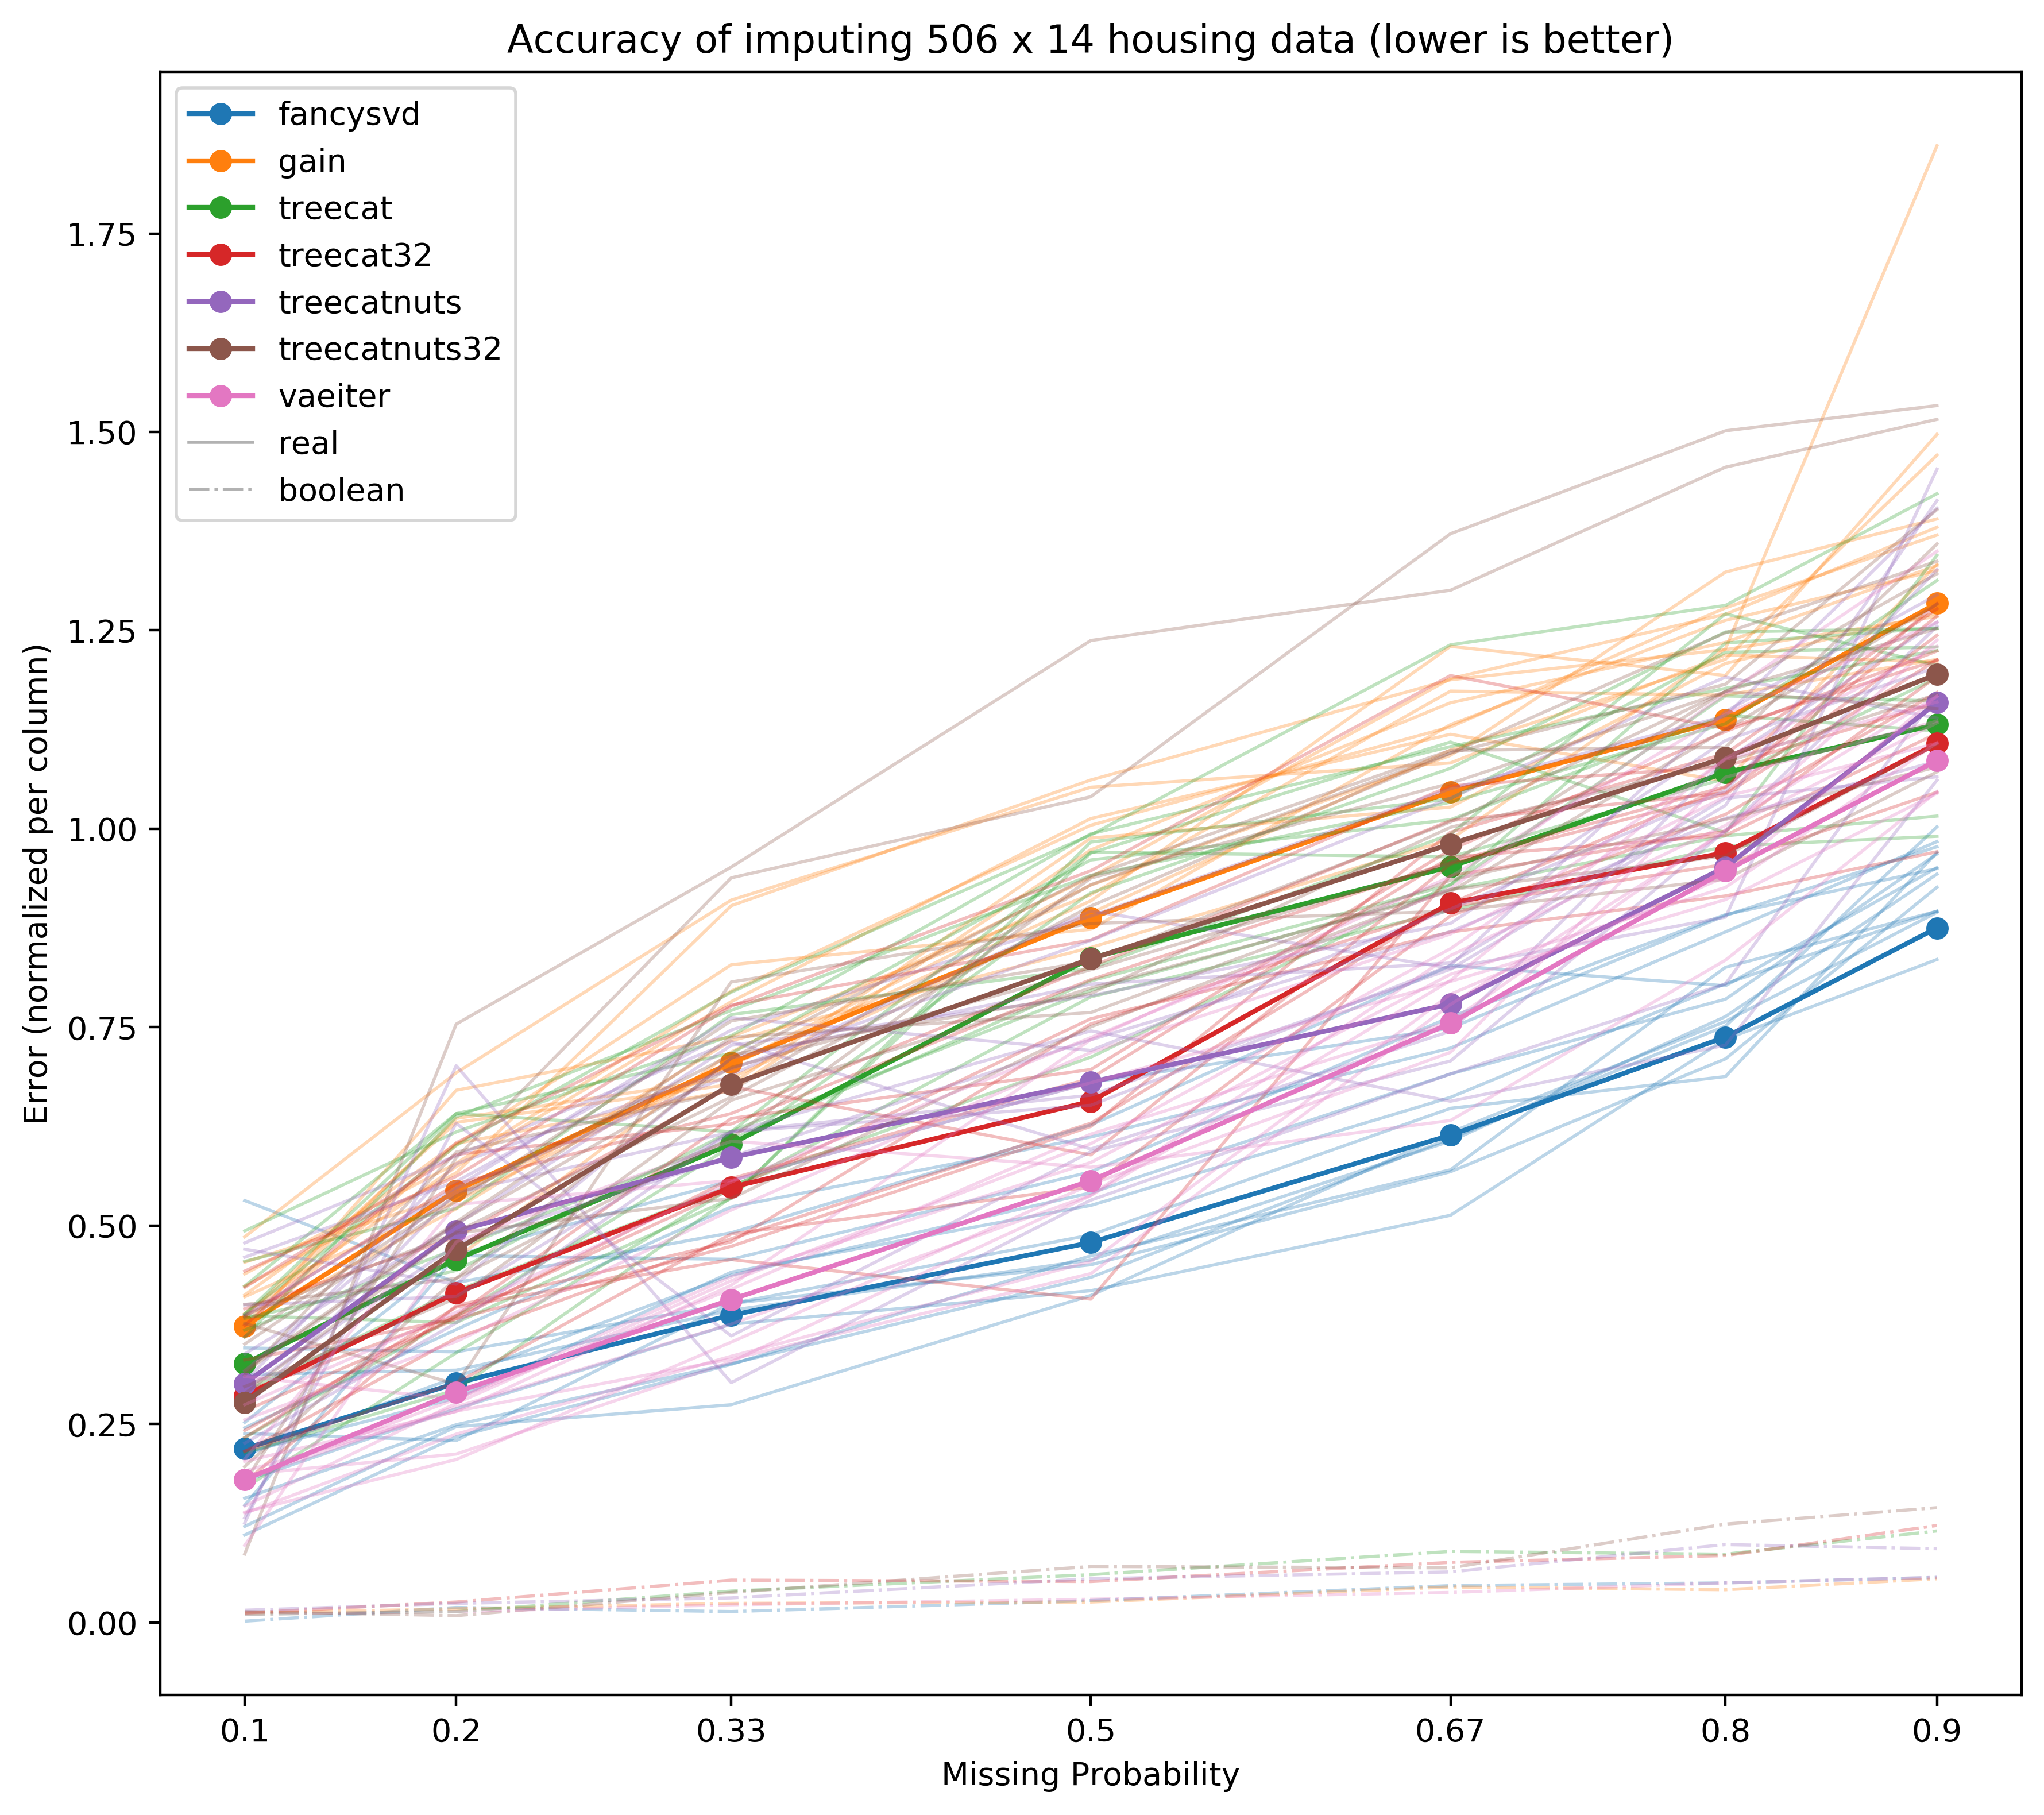

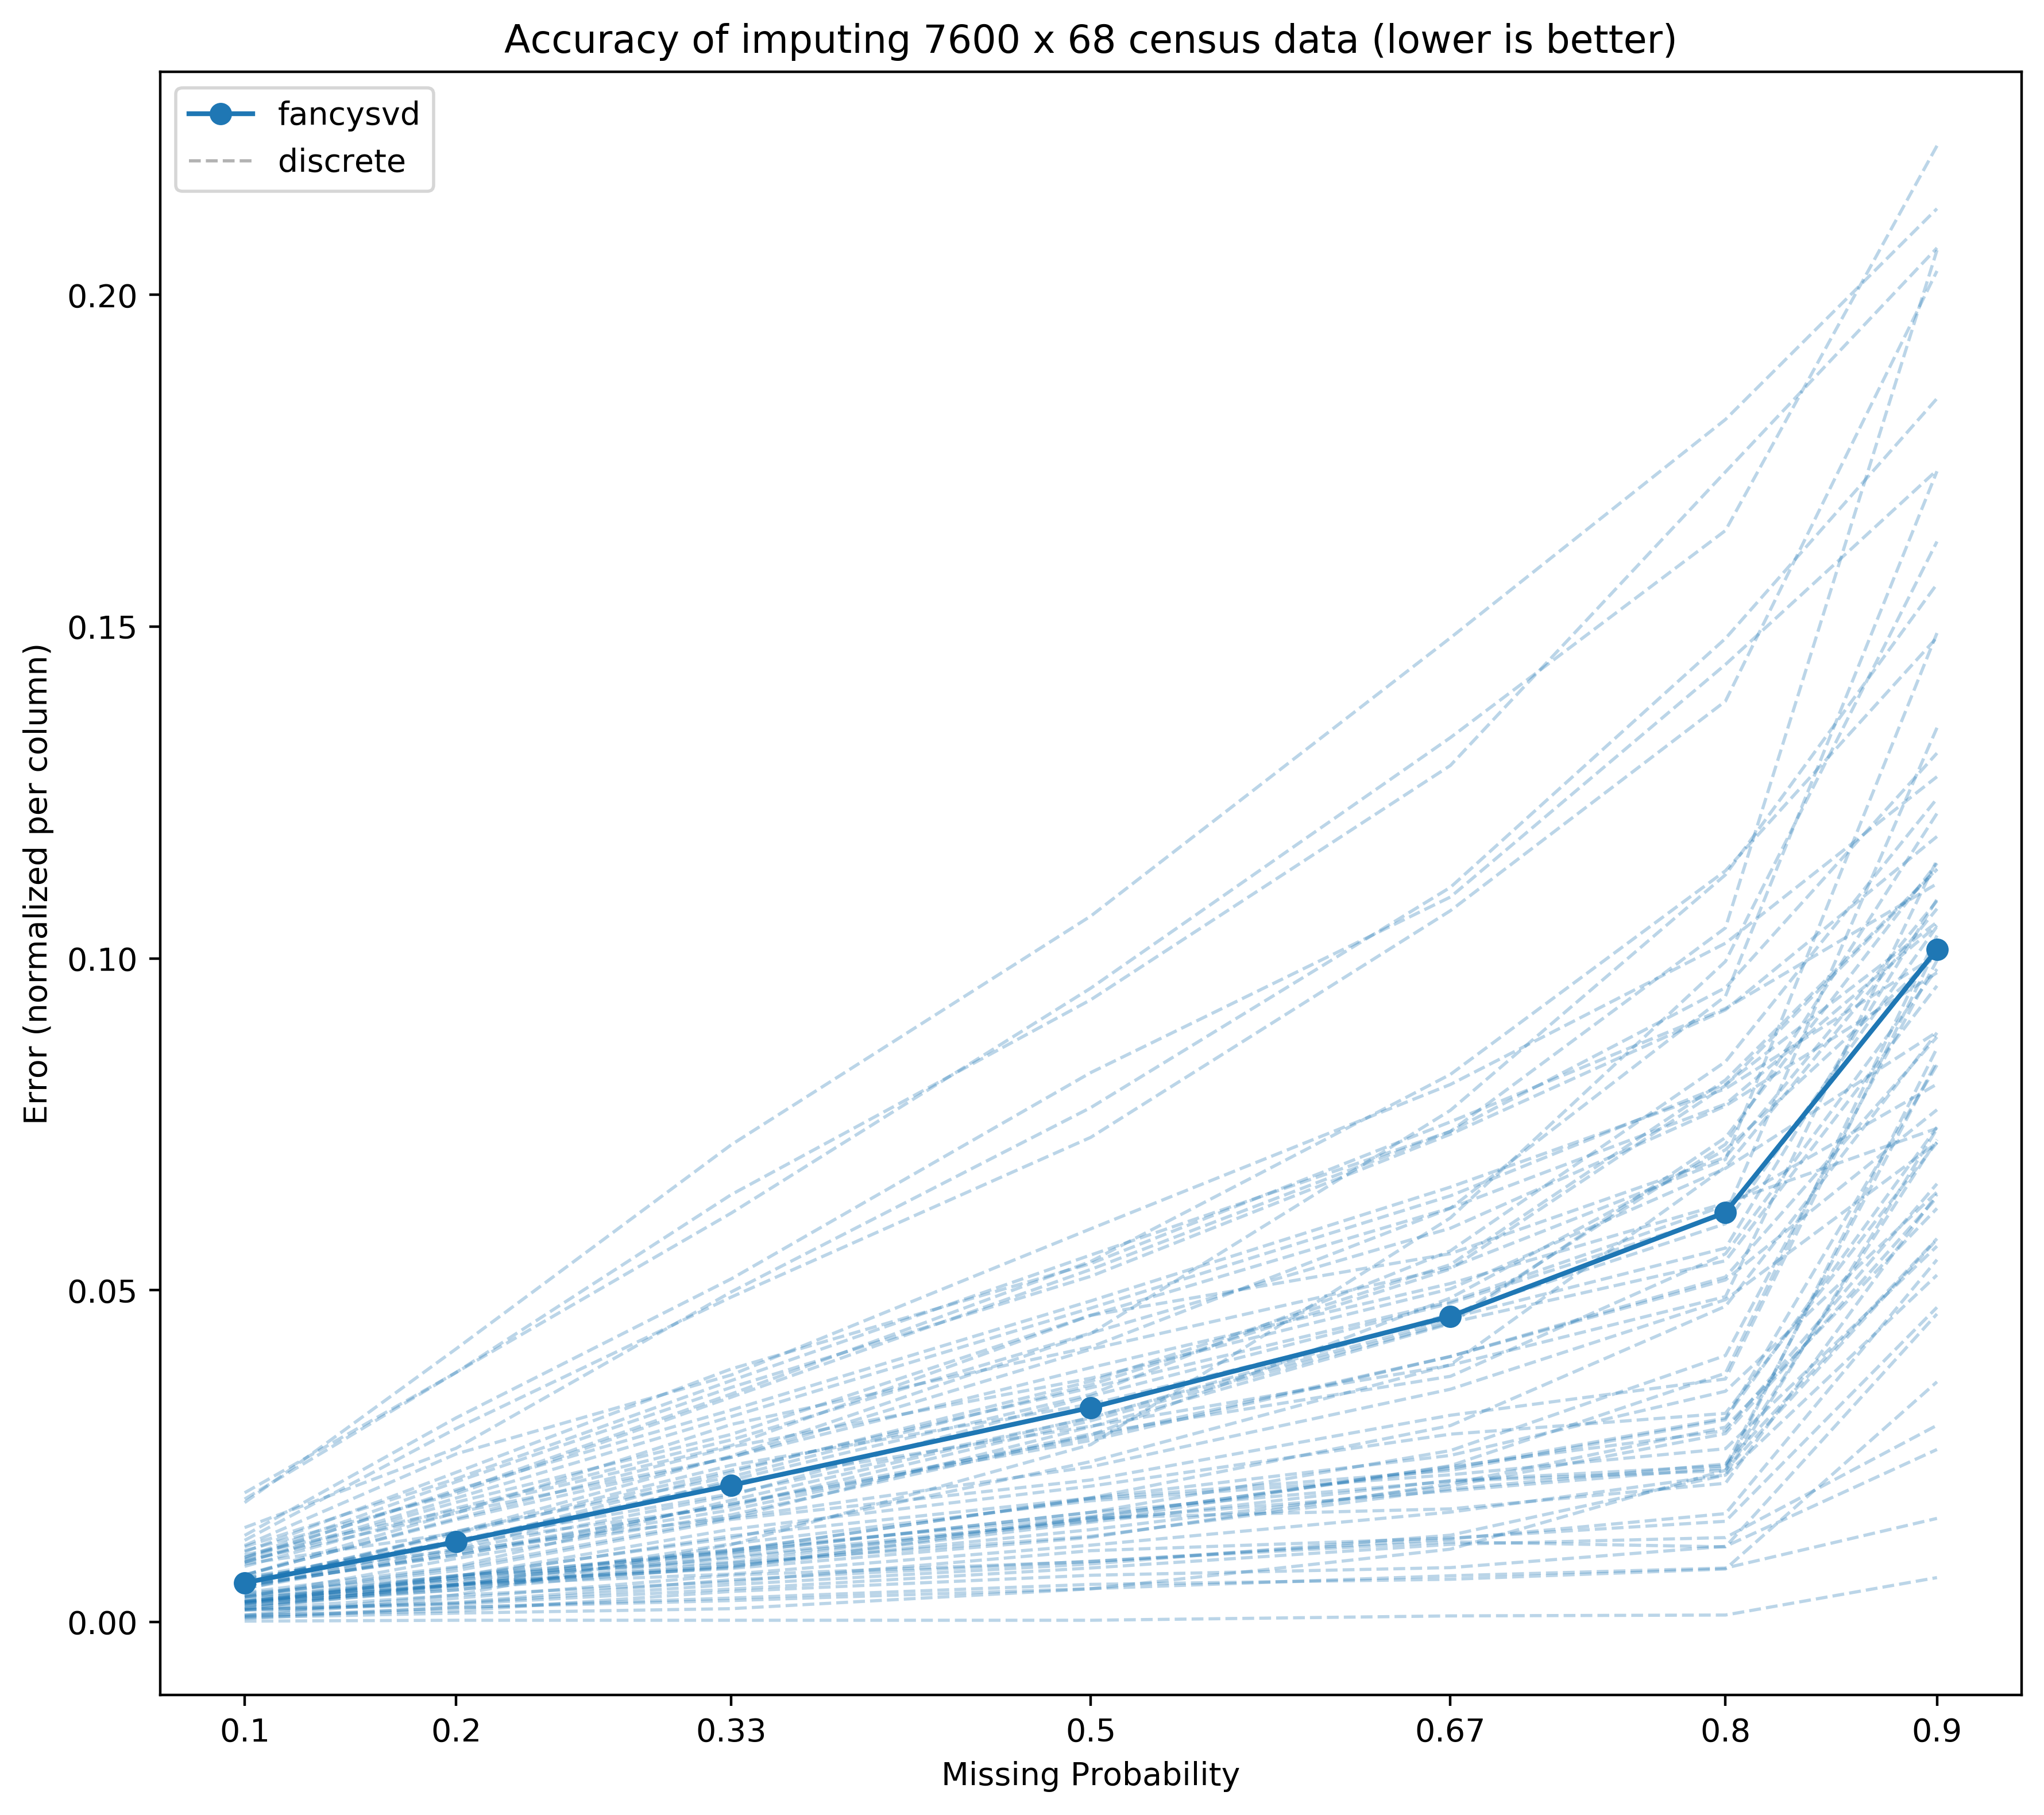

In [6]:
datasets = {m["args"].dataset: m for m in results}
sizes = {name: (m["num_cols"], m["num_rows"]) for name, m in datasets.items()}
for dataset in sorted(datasets, key=lambda name: sizes[name][0] * sizes[name][1]):
    pyplot.figure(figsize=(9, 8), dpi=400)
    types = set()
    for model in sorted(set(m["args"].model for m in results
                            if m["args"].dataset == dataset)):
        ms = [m for m in results if m["args"].dataset == dataset if m["args"].model == model]
        ms.sort(key=lambda m: m["args"].delete_percent)
        X = [m["args"].delete_percent / 100 for m in ms]
        Y = [np.mean(m["losses"]) for m in ms]
        p, = pyplot.plot(X, Y, label=model, marker='o')
        for f in range(len(ms[0]["losses"])):
            Y = [m["losses"][f] for m in ms]
            typ = ms[0]["types"][f]
            types.add(typ)
            linestyle = {"Real": '-', "Boolean": "-.", "Discrete": "--"}[typ]
            pyplot.plot(X, Y, color=p.get_color(), lw=1, alpha=0.3,
                        linestyle=linestyle)
    if "Real" in types:
        pyplot.plot([], [], 'k-', label="real", lw=1, alpha=0.3)
    if "Boolean" in types:
        pyplot.plot([], [], 'k-.', label="boolean", lw=1, alpha=0.3)
    if "Discrete" in types:
        pyplot.plot([], [], 'k--', label="discrete", lw=1, alpha=0.3)
    X = list(sorted(set(m["args"].delete_percent / 100
                        for m in results if m["args"].dataset == dataset)))
    # pyplot.yscale("log")
    pyplot.xticks(X, labels=["{:0.2g}".format(x) for x in X])
    pyplot.title("Accuracy of imputing {} x {} {} data (lower is better)".format(
        sizes[dataset][1], sizes[dataset][0], dataset))
    pyplot.xlabel("Missing Probability")
    pyplot.ylabel("Error (normalized per column)")
    pyplot.legend(loc="best")
    pyplot.tight_layout()

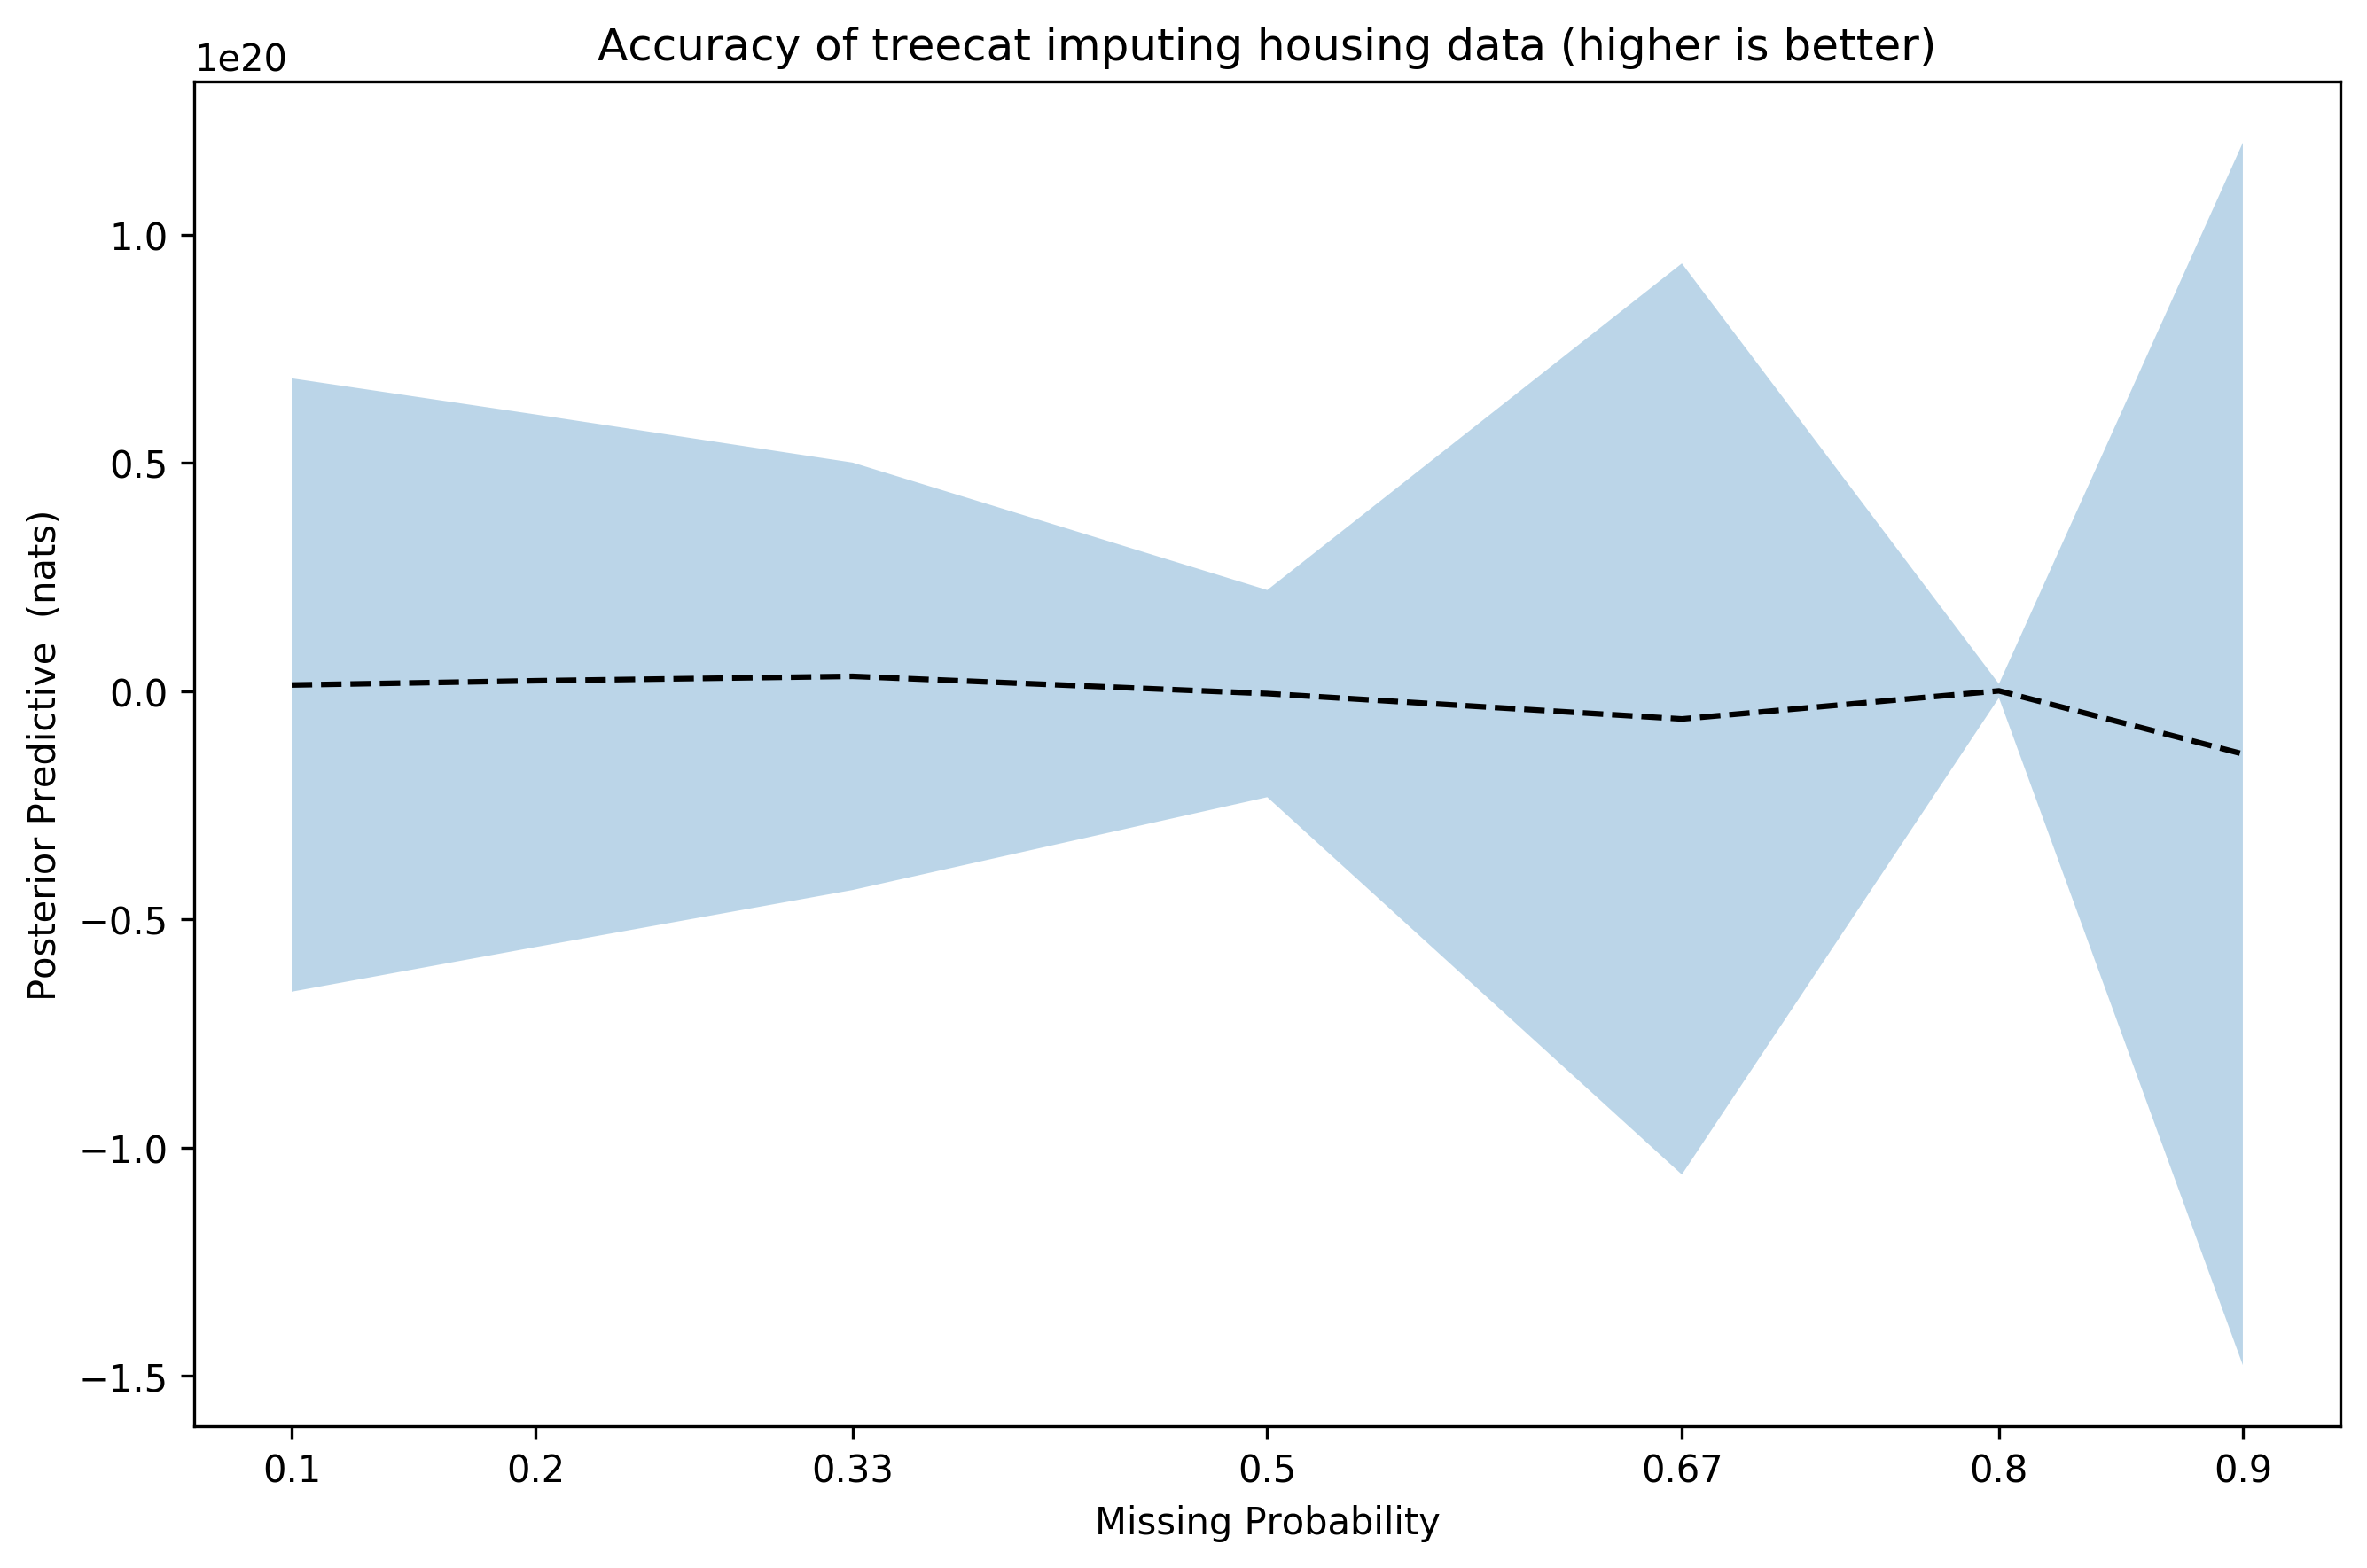

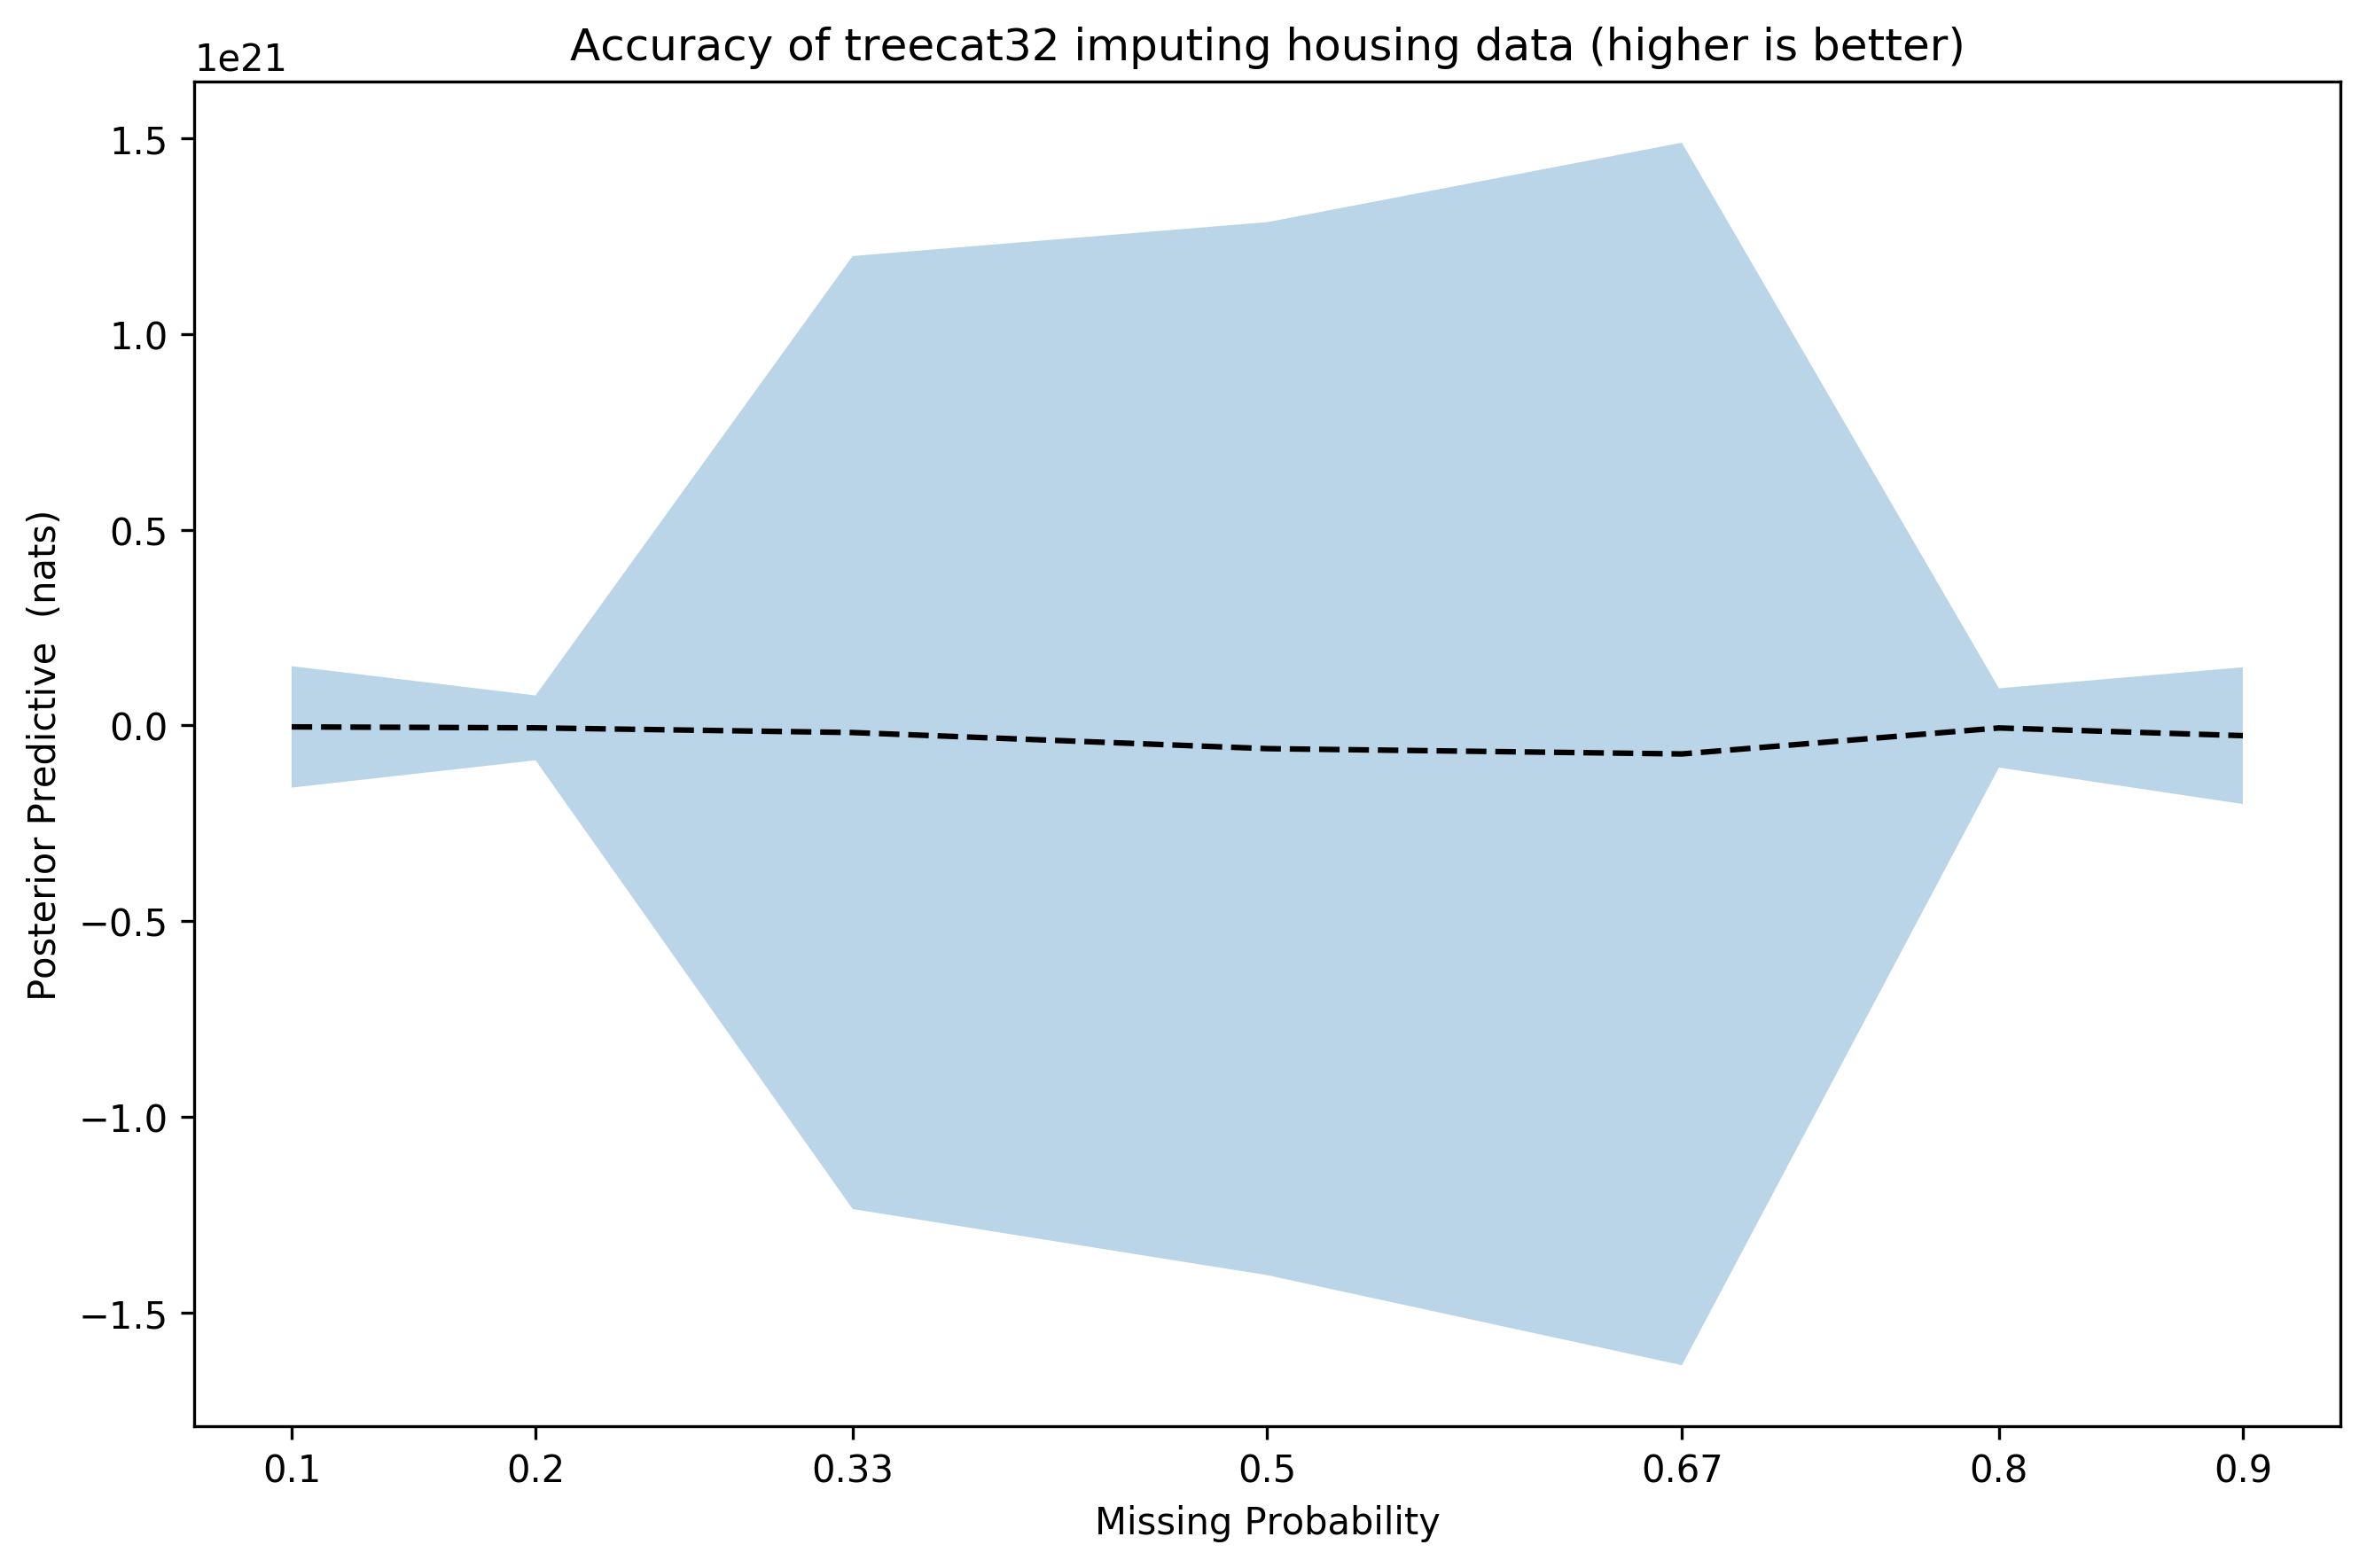

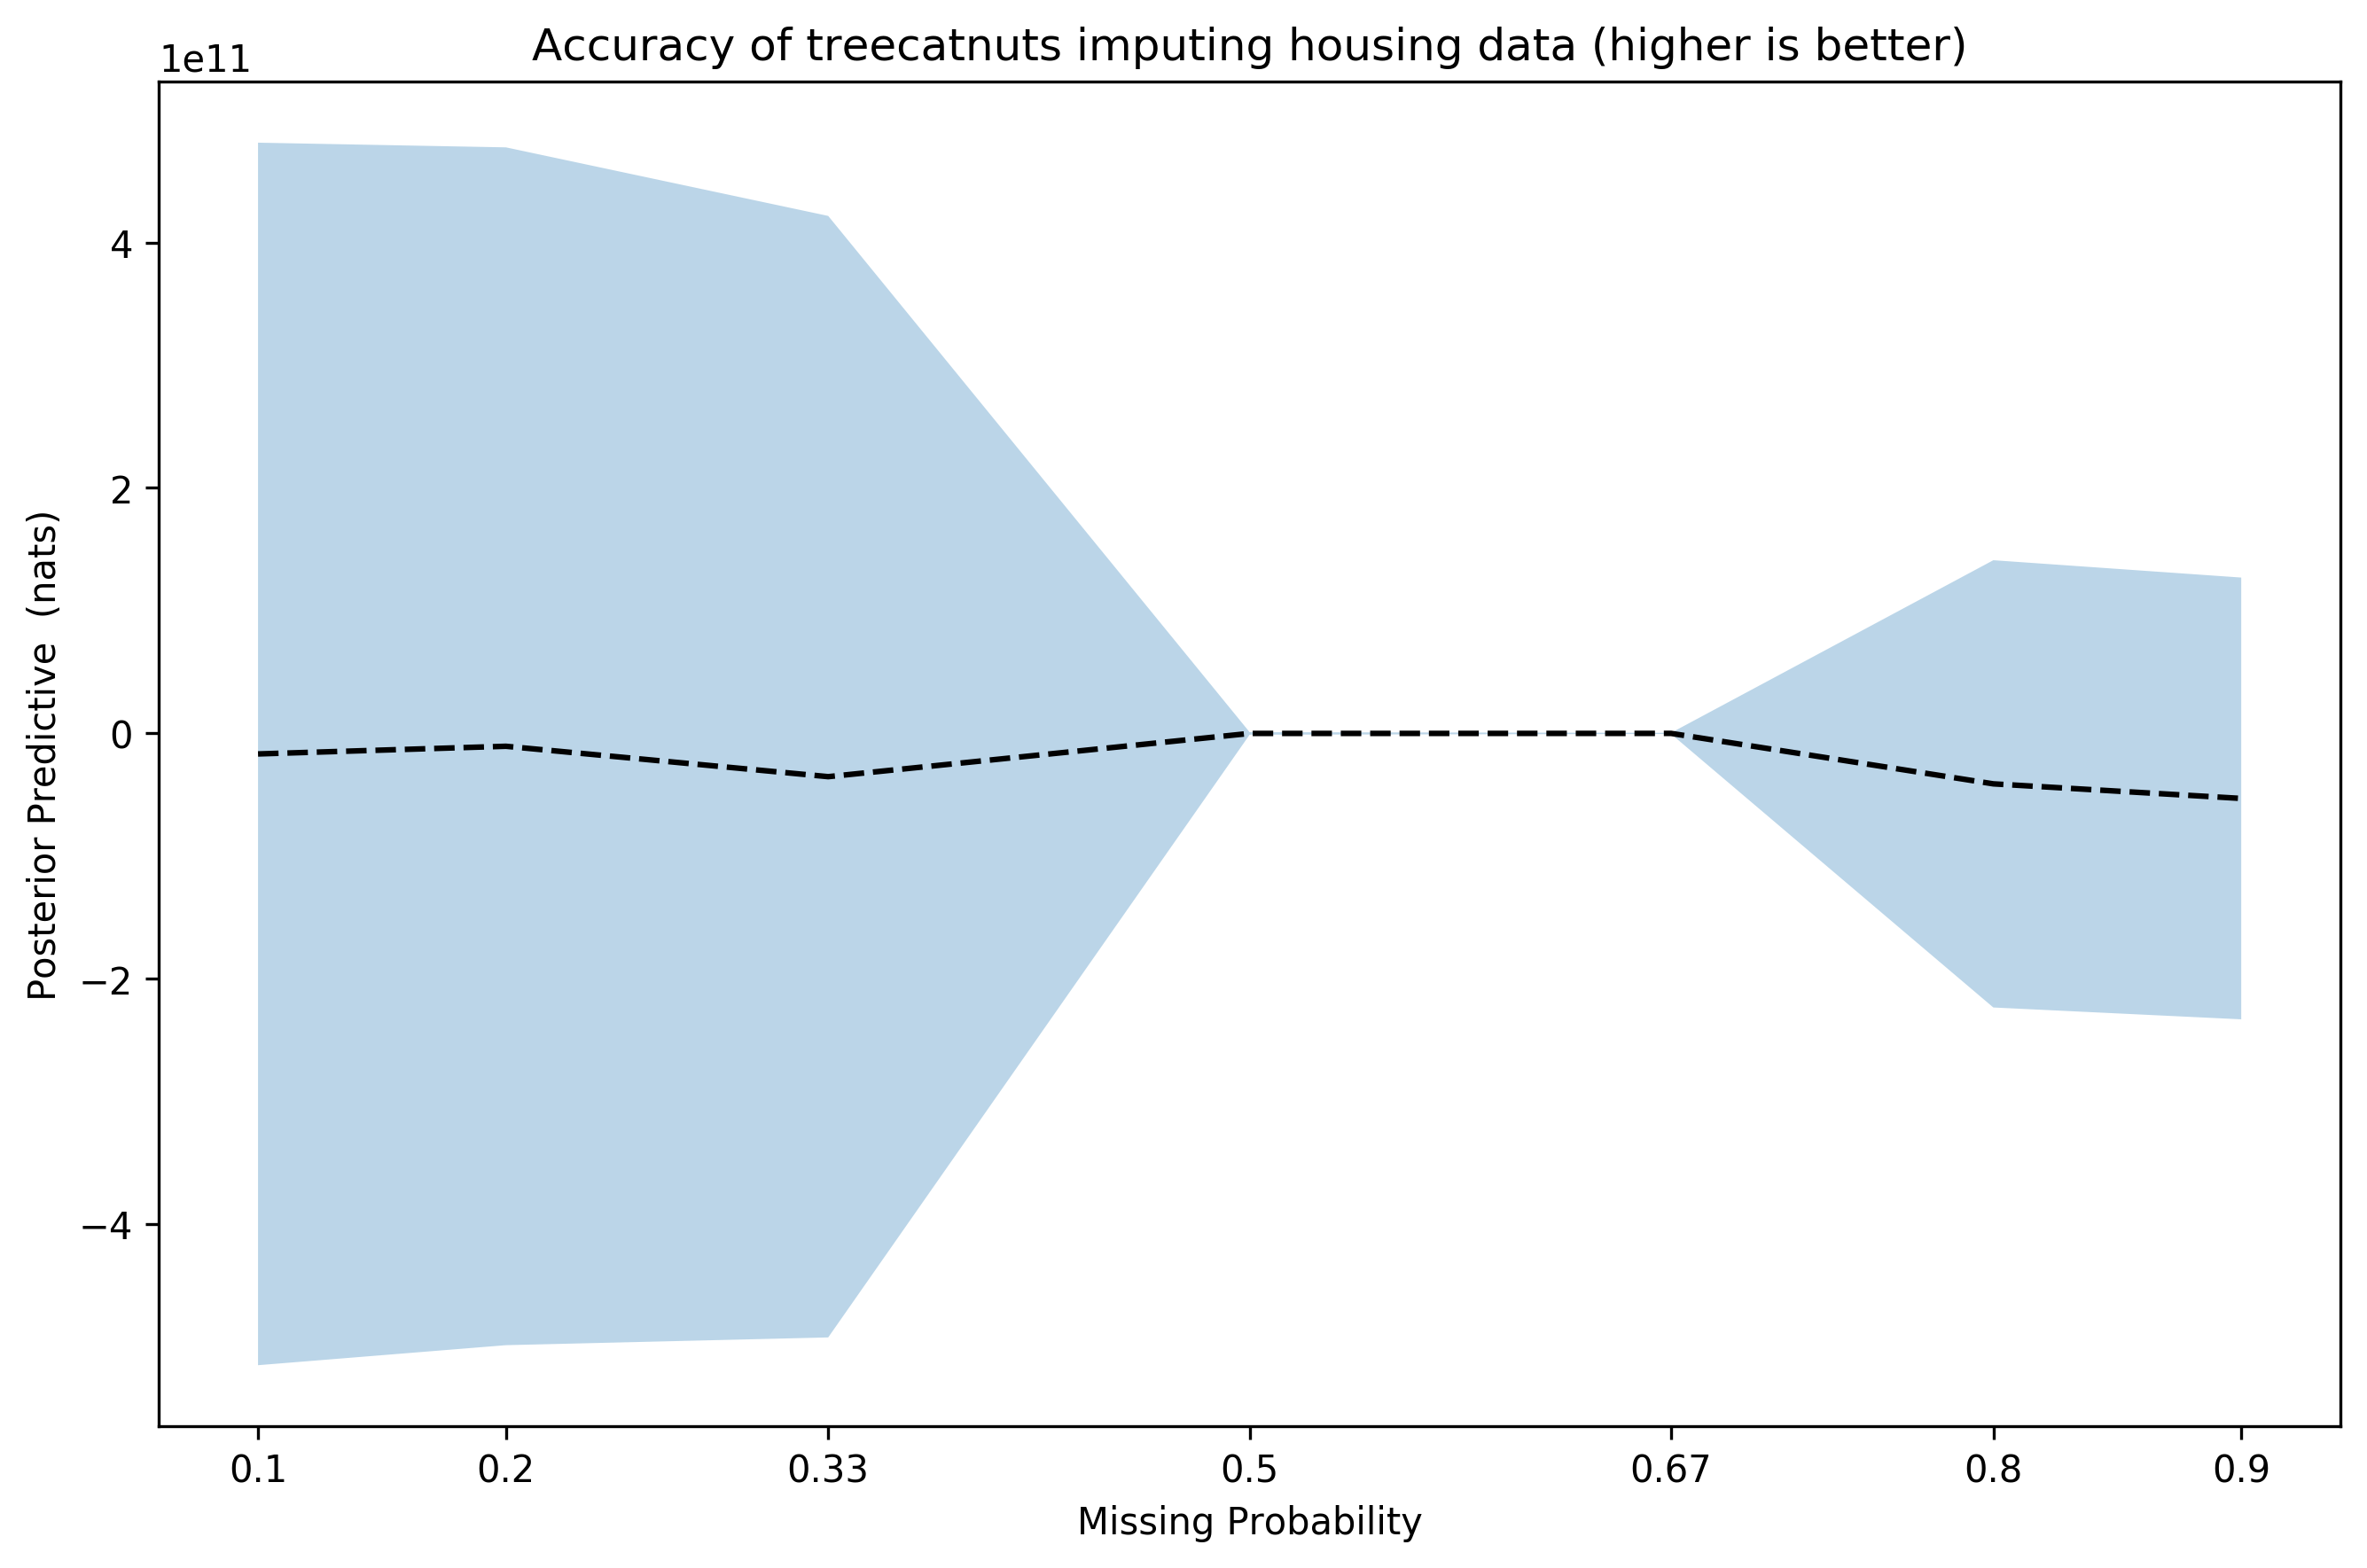

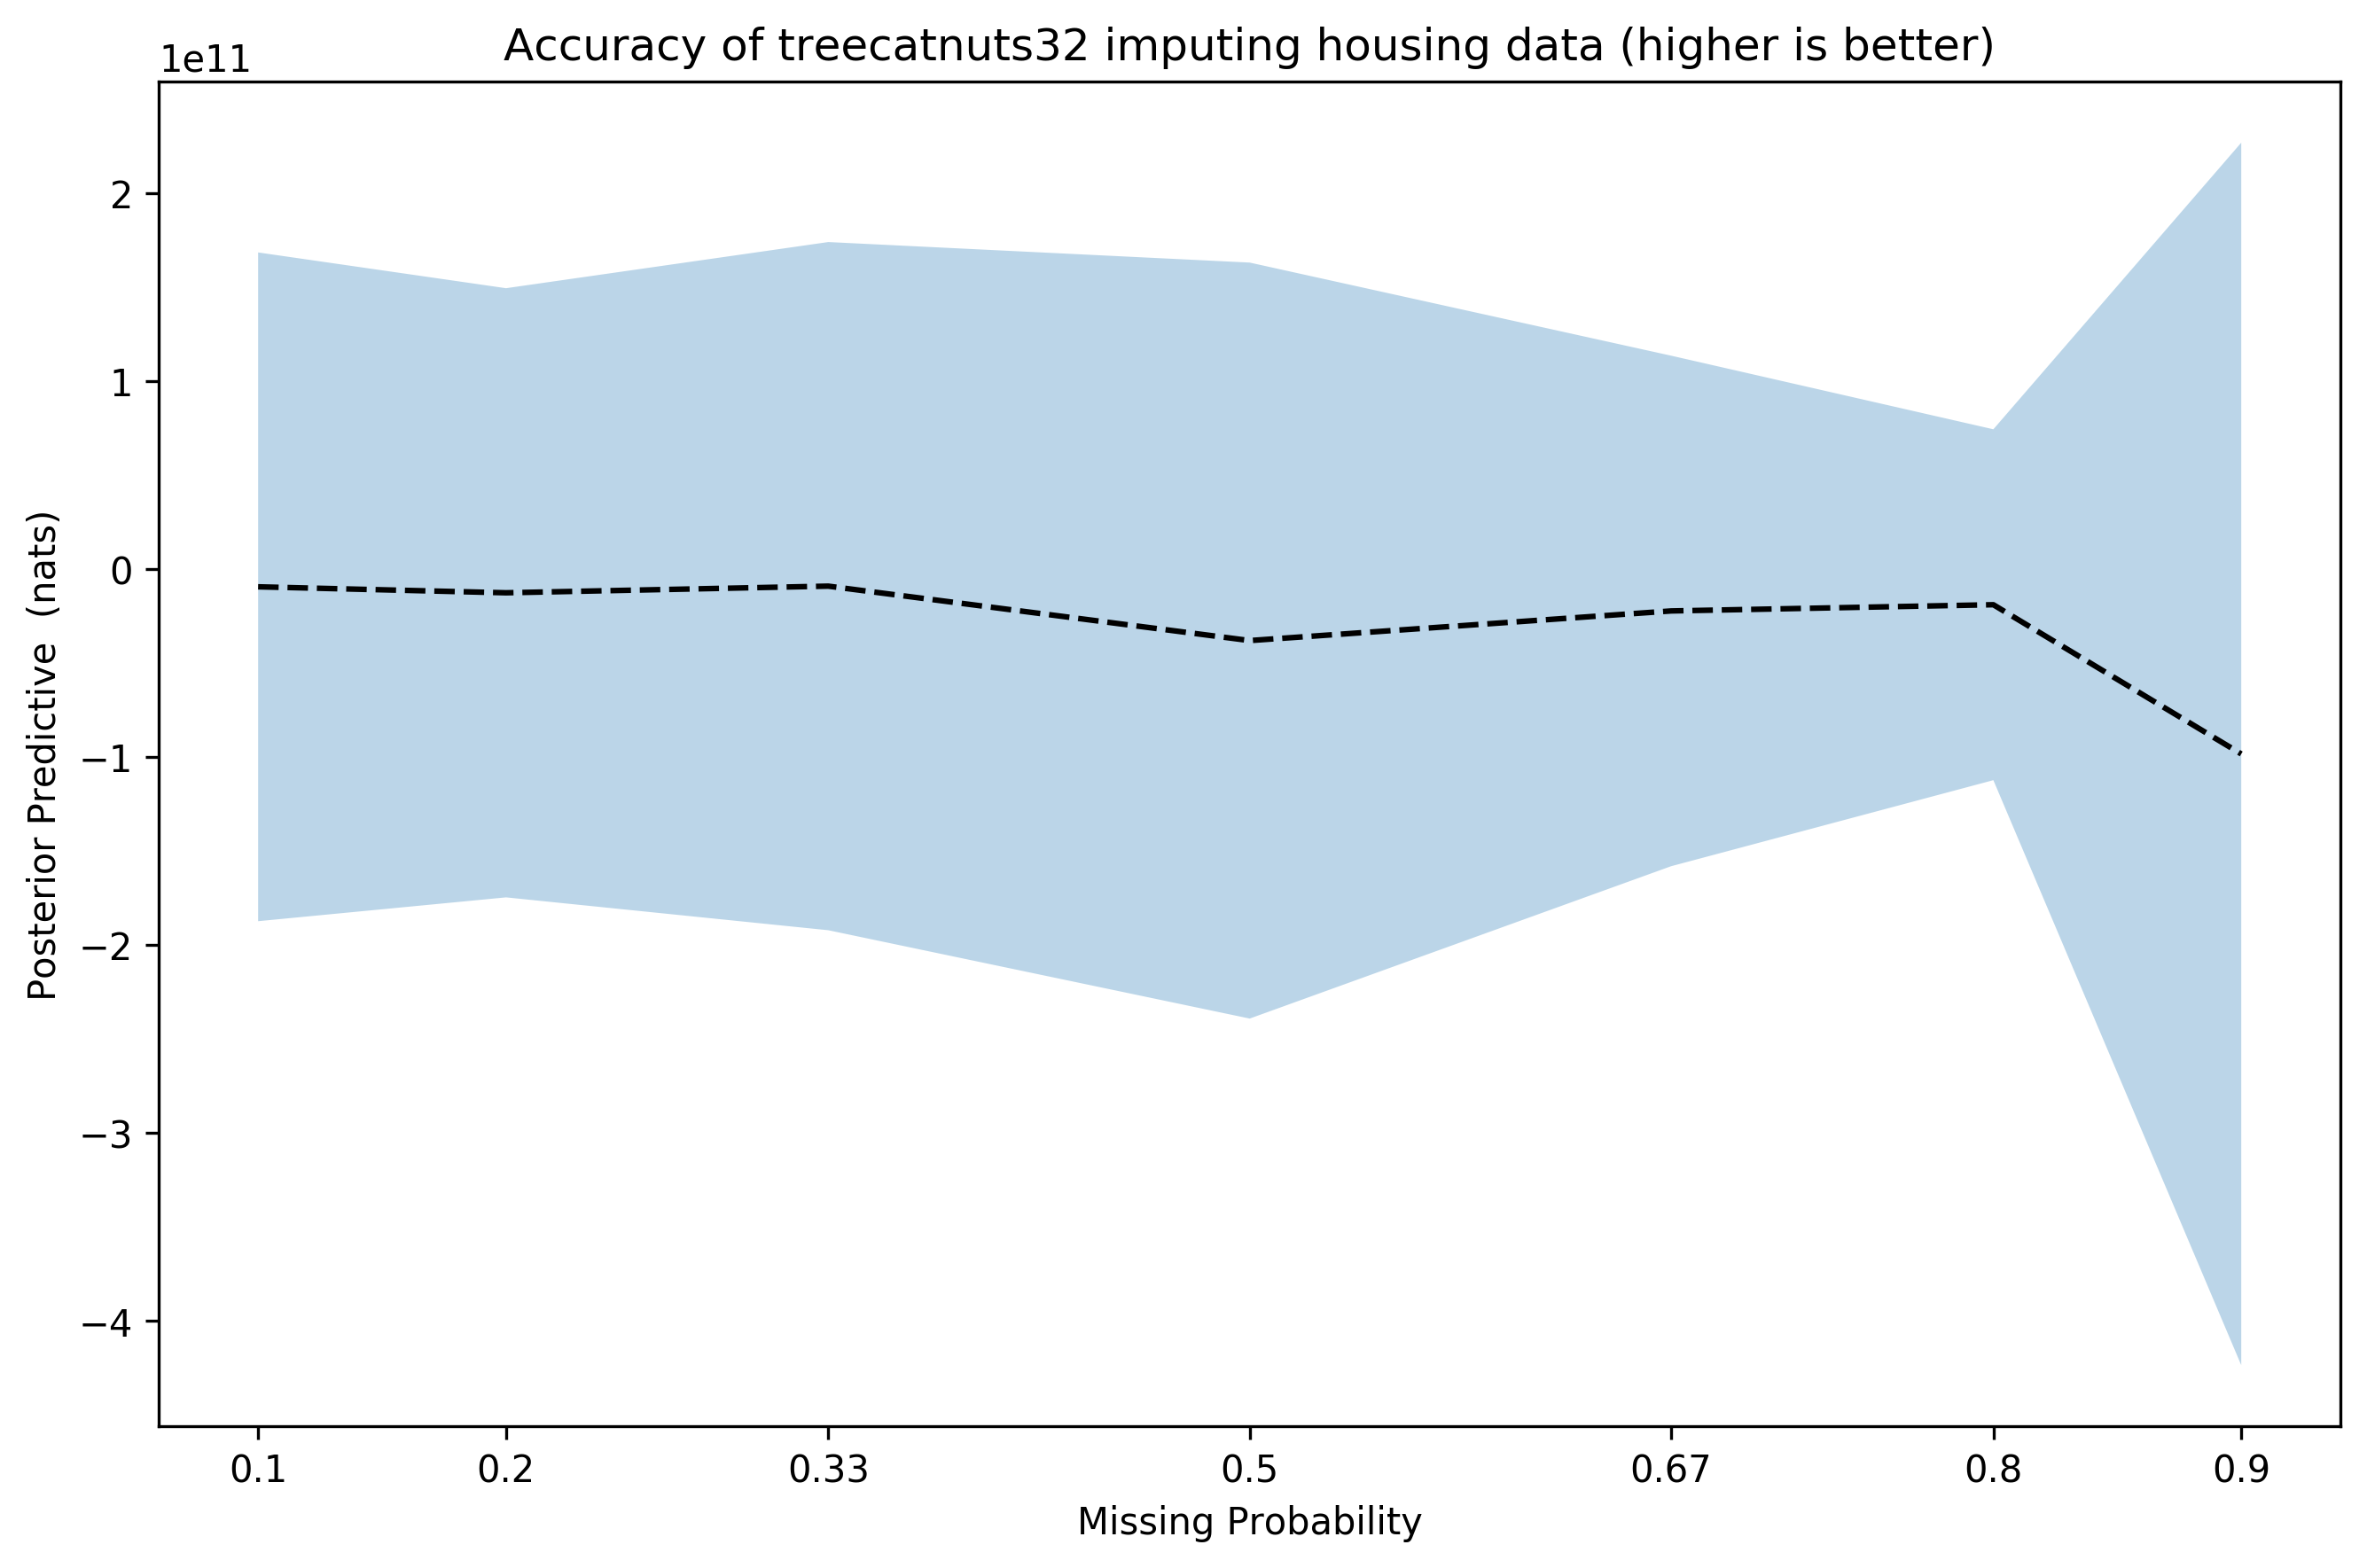

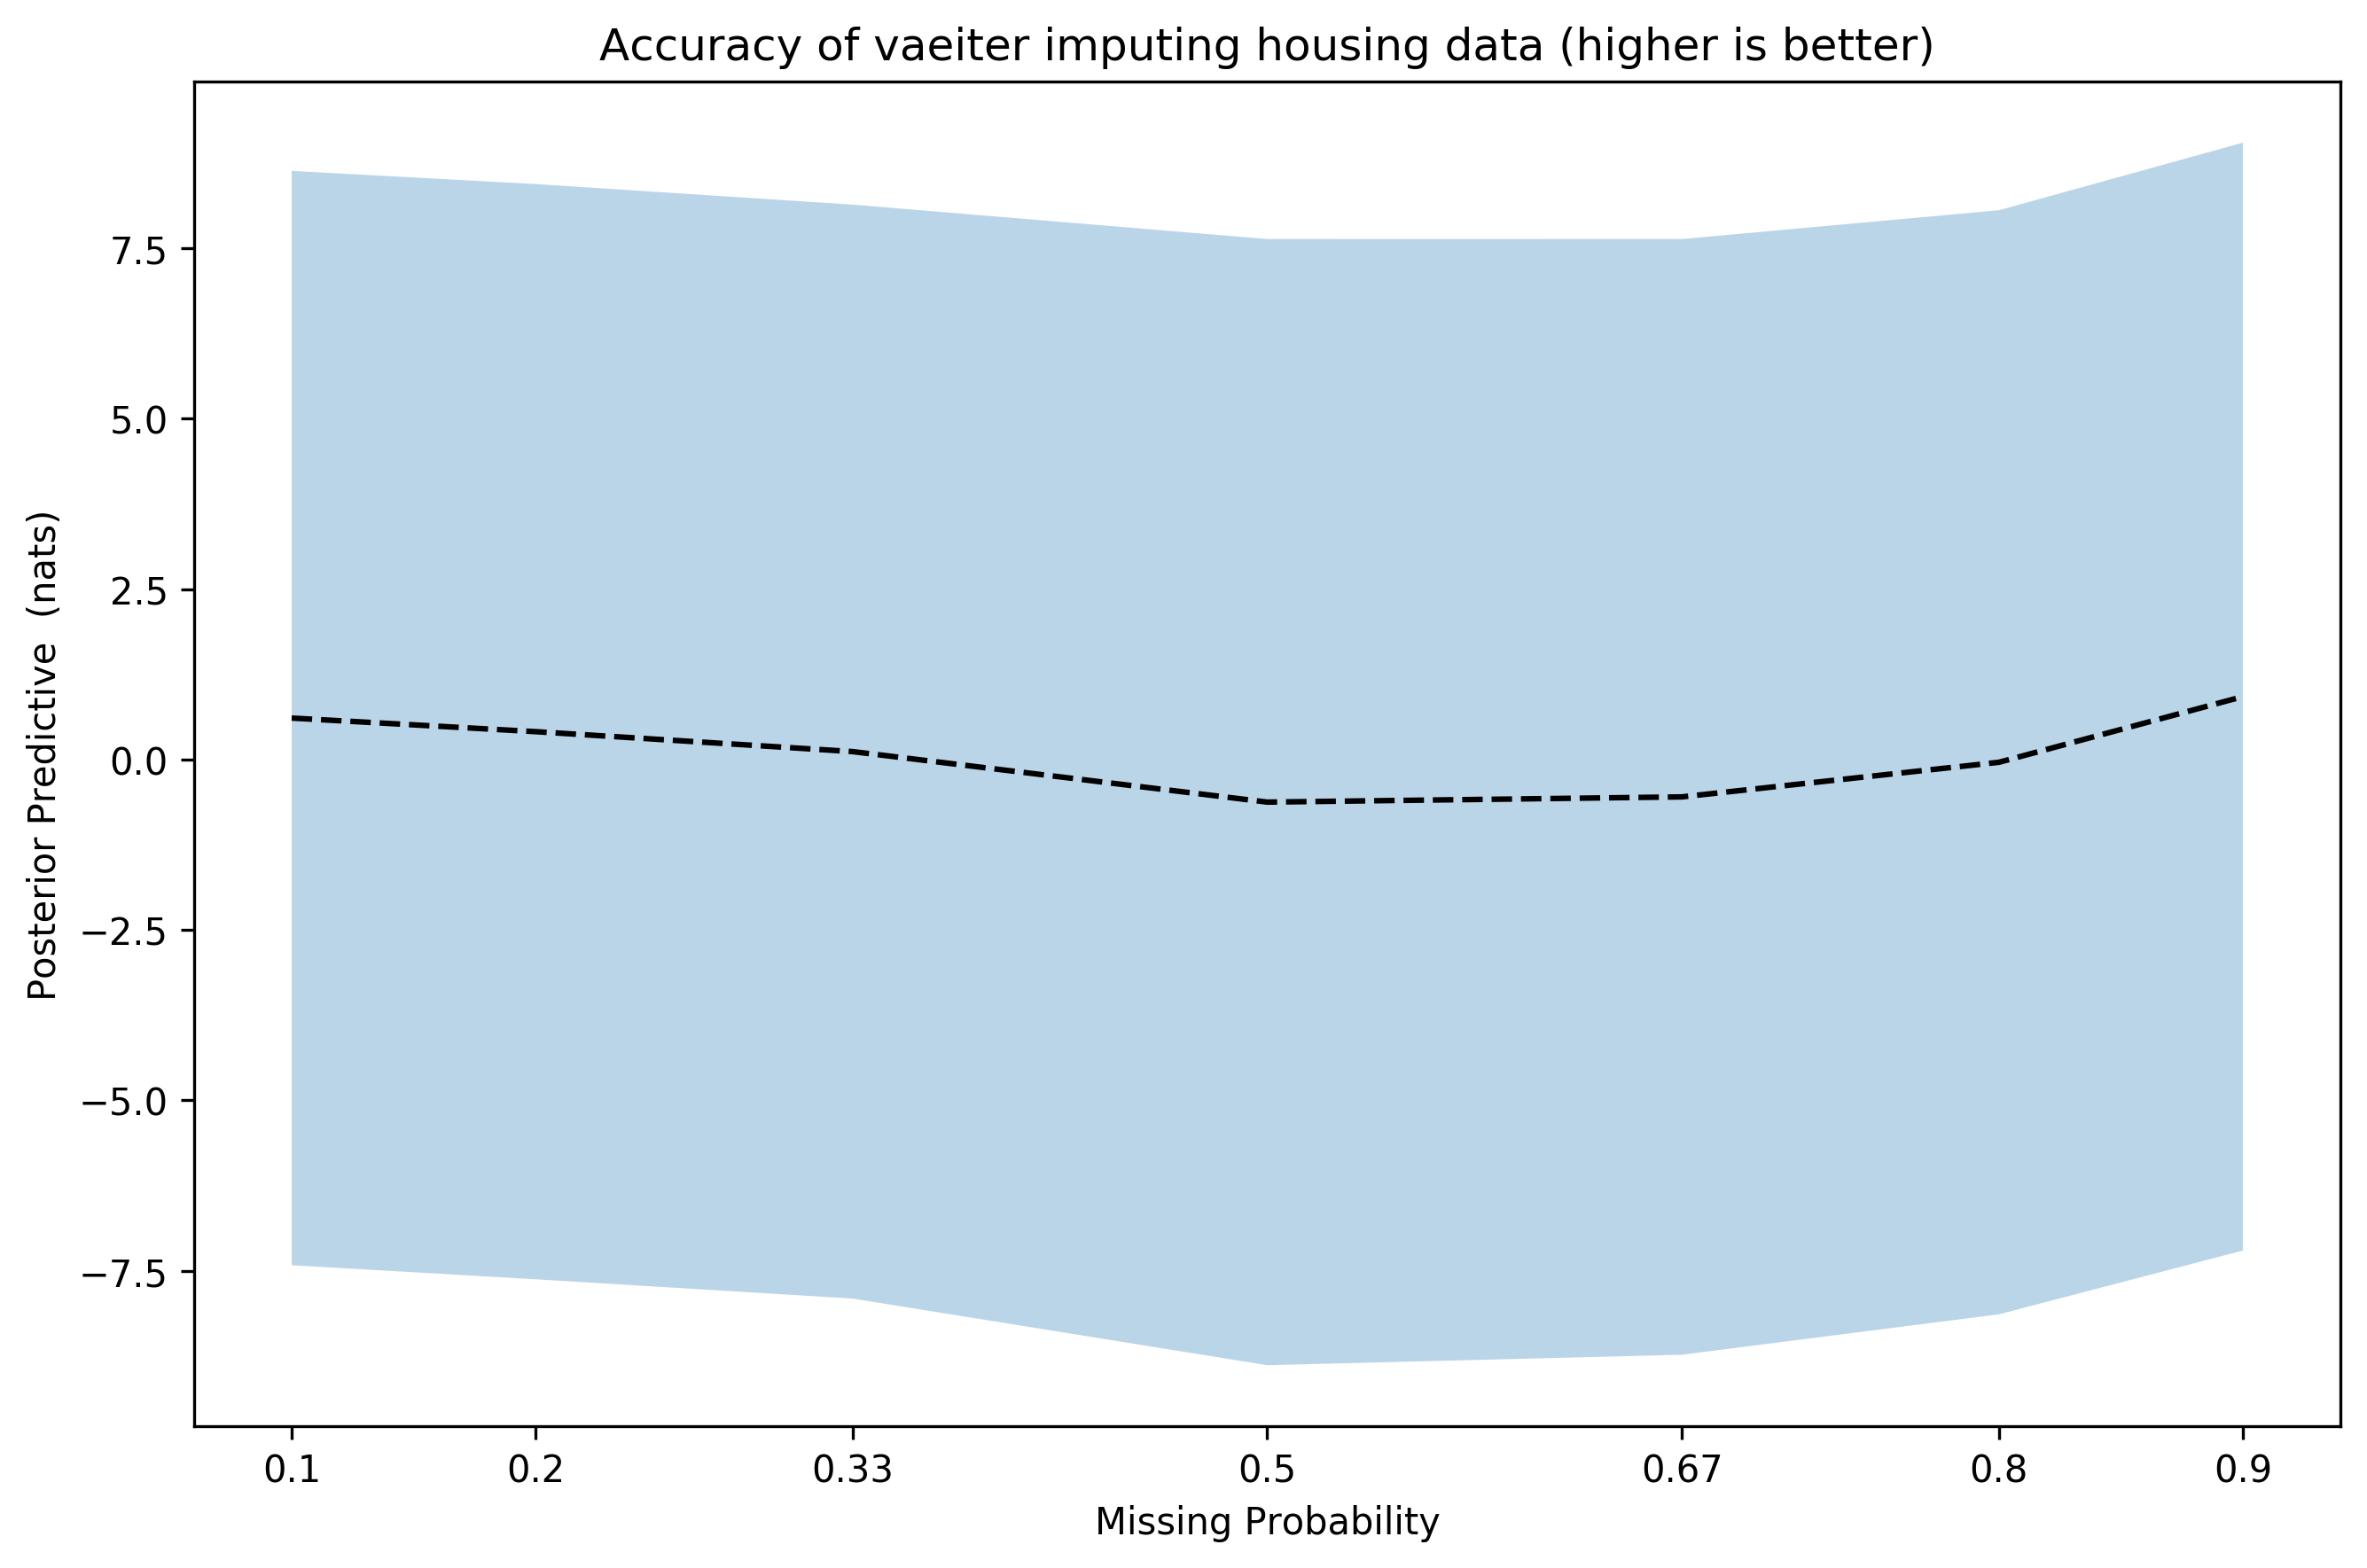

In [4]:
for dataset in sorted(set(m["args"].dataset for m in results)):
    for model in sorted(set(m["args"].model for m in results
                            if m["args"].dataset == dataset
                            if "posterior_predictive" in m)):
        ms = [m for m in results if m["args"].dataset == dataset if m["args"].model == model]
        ms.sort(key=lambda m: m["args"].delete_percent)
        X = [m["args"].delete_percent / 100 for m in ms]
        Y = np.array([m["posterior_predictive"].mean().item() for m in ms])
        dY = np.array([m["posterior_predictive"].std().item() for m in ms])
        
        pyplot.figure(figsize=(9, 6), dpi=300)
        pyplot.fill_between(X, Y - dY, Y + dY, alpha=0.3)
        pyplot.plot(X, Y, 'k--')
        pyplot.xticks(X, labels=["{:0.2g}".format(x) for x in X])
        pyplot.title("Accuracy of {} imputing {} data (higher is better)"
                     .format(model, dataset))
        pyplot.xlabel("Missing Probability")
        pyplot.ylabel("Posterior Predictive  (nats)")
        pyplot.tight_layout()